# DAL DATASET ALL'ALGORITMO: COME SI SVILLUPA UN MODELLO?

In questa esercitazione viene mostrato come da un semplice Dataset (in questo caso scaricato da Internet dalla community di Kaggle, https://www.kaggle.com/?utm_source=homescreen) si riesce a sviluppare un modello (quindi un algoritmo) per prevedere una o più variabili target. Per fare questo bisogna prima però eseguire dei passaggi preliminari che son fondamentali per la cura e la precisione del modello finale (come ad esempio quelli di gestire i NaN e gli Outliers)

Il mio dataset è questo: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

## FASE 1: SCEGLIERE (O CREARE), IMPORTARE E SALVARE IL DATASET

1) SCARICARE IL DATASET E INSERIRLO IN UN PATH (PER COMODITA LO METTO NELLA STESSA CARTELLA)
2) IMPORTARE LE LIBRERIE NECESSARIE: PANDAS (PER LEGGERE IL DATASET) E OS (PER GESTIRE I PATH)
3) IMPORTARE IL DATASET USANDO LE FUNZIONI DI PANDAS


In [1]:
import pandas  as pd # Importare la libreria "Pandas" per poter gestire i Dataset
import os # Importare la libreria "os" per gestire i path

# Per importare il Dataset possiamo usare due funzione di Pandas:
# 1) pd.read_csv(): per leggere il file CSV (comma separated values)
# 2) pd.read_excel(): per leggere i file Excel

path_dataset = r"C:\Users\matte\OneDrive - Scuola Paritaria S. Freud SRL\Desktop\FREUD\2D\QUADERNI E ALTRO\ROBOTICA ED AI\ESERCIZI IN CLASSE PYTHON\ds_salaries.csv" # Il prefisso "r" serve per evitare che ci siano confusioni nell'interpretazione della stringa, come ad esempio: numeri, caratteri speciali e backslash
dataset = pd.read_csv(path_dataset)

## FASE 2: VISUALIZZAZIONE E ANALISI DEL DATASET (CON I GRAFICI)

1) STAMPARE IL DATASET
2) PER OGNI FEATURE ANALIZZARE COME SIA COMPOSTA: CIOè CHE VALORI HA NEL DETTAGLIO (TIPO UNITà DI MISURA O VALUTE)
3) ANALIZZARE COSA SIA MEGLIO TENERE O COSA INVECE è MEGLIO BUTTARE

Esperienza lavorativa:

. SE = Senior
. MI = Mid-level
. EN = Entry-level

Tipo di impiego:

. FT = Full-time
. CT = Contract

In [2]:
dataset # Stampare il Dataset serve per poterlo analizzare nel dettaglio meglio, come ad esempio visualizzare le Feature e le istanze per decidere cose sia meglio tenere e cosa invece sia meglio eliminare
# Scrivendo solo il nome del dataset, quest'ultimo si stamperà (solo la parte iniziale e finale)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
# Stampare i valori unici (unique), nonchè tutti i possibili output per ogni Feature, serve per analizzare meglio il Dataset nel dettaglio di ogni Feature e capire così tutti i possibili ambiti
print("I valori di work_year sono:") # All'inizio viene stampata una stringa di testo esplicativa
print(dataset["work_year"].unique()) # Poi si stampano i veri e propri valori unici
print("I valori di experience_level sono:")
print(dataset["experience_level"].unique())
print("I valori di employment_type sono:")
print(dataset["employment_type"].unique())
print("I valori di job_title sono:")
print(dataset["job_title"].unique())
print("I valori di salary sono:")
print(dataset["salary"].unique())
print("I valori di salary_currency sono:")
print(dataset["salary_currency"].unique())
print("I valori di salary_in_usd sono:")
print(dataset["salary_in_usd"].unique())
print("I valori di employee_residence sono:")
print(dataset["employee_residence"].unique())
print("I valori di remote_ratio sono:")
print(dataset["remote_ratio"].unique())
print("I valori di company_location sono:")
print(dataset["company_location"].unique())
print("I valori di company_size sono:")
print(dataset["company_size"].unique())

I valori di work_year sono:
[2023 2022 2020 2021]
I valori di experience_level sono:
['SE' 'MI' 'EN' 'EX']
I valori di employment_type sono:
['FT' 'CT' 'FL' 'PT']
I valori di job_title sono:
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Auto

## FASE 3: MODIFICA DEL DATASET (CON I GRAFICI)

1) VOGLIAMO MODIFICARE IL DATASET CONSIDERANDO SOLO TRE FEATURES E CON TUTTI I SALARI IN DOLLARI 
2) ELIMINARE LE FEATURE INUTILI AL NOSTRO ALGORITMO FINALE
3) SALVARE SOVRASCRIVENDO IL DATASET
4) STAMPARE IL NUOVO DATASET PER VERIFICARE SE LE OPERAZIONE FATTE PRECEDENENTE HANNO AVUTO UN SEGUITO POSITIVO

TUTTE LE MODIFICHE VENGONO FATTE SU UN DATASET CLONE, IN MODO POI DA POTERLO COMPARARE CON L'ORIGINALE

In [4]:
job_titles = ['Data Scientist', 'Machine Learning Engineer', 'Data Analyst', 'Data Engineer', 'Data Architect', 'Business Intelligence Engineer', 'Data Strategist', 'Data Quality Analyst', 'Data Science Manager', 'Data Operations Engineer']
print(len(job_titles))
dataset_ridotto = dataset[dataset['job_title'].isin(job_titles)]
dataset_ridotto["job_title"].unique() # Controllare che l'unico valore

10


array(['Data Scientist', 'Data Analyst', 'Business Intelligence Engineer',
       'Machine Learning Engineer', 'Data Strategist', 'Data Engineer',
       'Data Quality Analyst', 'Data Architect', 'Data Science Manager',
       'Data Operations Engineer'], dtype=object)

In [5]:
print("I valori di job_title sono:")
print(dataset_ridotto["job_title"].unique())

I valori di job_title sono:
['Data Scientist' 'Data Analyst' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Data Quality Analyst' 'Data Architect' 'Data Science Manager'
 'Data Operations Engineer']


In [6]:
dataset_ridotto=dataset[dataset["salary_currency"] == "USD"] # Filtrare le righe (istanze) del dataset in cui i valori di salary currency è "USD"
dataset_ridotto["salary_currency"].unique() # Controllare che l'unico valore in salary currency sia "USD"

array(['USD'], dtype=object)

In [7]:
print("I valori di salary_currency sono:")
print(dataset_ridotto["salary_currency"].unique())

I valori di salary_currency sono:
['USD']


In [8]:
dataset_ridotto=dataset[dataset["company_location"] == "US"] # Filtrare le righe (istanze) del dataset in cui i valori di company location è "US"
dataset_ridotto["company_location"].unique() # Controllare che l'unico valore in company location sia "US"

array(['US'], dtype=object)

In [9]:
print("I valori di company_location sono:")
print(dataset_ridotto["company_location"].unique())

I valori di company_location sono:
['US']


In [10]:
dataset_ridotto=dataset_ridotto[dataset_ridotto["work_year"] == 2023] # Filtrare le righe (istanze) del dataset
dataset_ridotto["work_year"].unique() # Controllare che l'unico valore

array([2023], dtype=int64)

In [11]:
print("I valori di work_year sono:")
print(dataset_ridotto["work_year"].unique())

I valori di work_year sono:
[2023]


In [12]:
dataset=dataset[dataset["work_year"] == 2023] # Filtrare le righe (istanze) del dataset in cui i valori di work_year è "2023"
dataset["work_year"].unique() # Controllare che l'unico valore in work_year è "2023"

array([2023], dtype=int64)

In [13]:
print("I valori di work_year sono:")
print(dataset["work_year"].unique())

I valori di work_year sono:
[2023]


In [14]:
dataset_ridotto = dataset_ridotto[["experience_level","job_title","salary","company_location"]] # Filtrare solo le features scelte e il target (salary). Le altre features non scritte veranno eliminate
dataset_ridotto

,experience_level,job_title,salary,company_location
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
5,SE,Applied Scientist,222200,US
6,SE,Applied Scientist,136000,US
9,SE,Data Scientist,147100,US
...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US
1818,MI,Data Scientist,90000,US
1819,EN,Data Engineer,160000,US


In [15]:
dataset = dataset[["experience_level","job_title","salary","company_location"]] # Filtrare solo le features scelte e il target (salary). Le altre features non scritte veranno eliminate
dataset

,experience_level,job_title,salary,company_location
0,SE,Principal Data Scientist,80000,ES
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
3,SE,Data Scientist,175000,CA
4,SE,Data Scientist,120000,CA
...,...,...,...,...
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US
1818,MI,Data Scientist,90000,US
1819,EN,Data Engineer,160000,US


In [16]:
dataset.duplicated().sum()

722

In [17]:
dataset = dataset.drop_duplicates()

In [18]:
dataset.duplicated().sum()

0

In [19]:
dataset_ridotto.duplicated().sum()

703

In [20]:
dataset_ridotto = dataset_ridotto.drop_duplicates()

In [21]:
dataset_ridotto.duplicated().sum()

0

In [22]:
dataset

,experience_level,job_title,salary,company_location
0,SE,Principal Data Scientist,80000,ES
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
3,SE,Data Scientist,175000,CA
4,SE,Data Scientist,120000,CA
...,...,...,...,...
1809,SE,Data Engineer,182000,US
1814,SE,Machine Learning Engineer,261500,US
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US


In [23]:
dataset_ridotto

,experience_level,job_title,salary,company_location
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
5,SE,Applied Scientist,222200,US
6,SE,Applied Scientist,136000,US
9,SE,Data Scientist,147100,US
...,...,...,...,...
1809,SE,Data Engineer,182000,US
1814,SE,Machine Learning Engineer,261500,US
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US


## FASE 4: LE DISTRIBUZIONI E I GRAFICI SULLE MODIFICHE DEL DATASET RISPETTO AL DATASET ORIGINALE (CON I GRAFICI)

1) CONFRONTIAMO LE DISTRIBUZIONE DEI TITOLI DI LAVORI "MONDIALE" VS CON QUELLA AMERICANA

In [24]:
from matplotlib import pyplot as plt

persone_totali = len(dataset)

# Calcolare le percentuali dei titoli di lavoro mondiali rispetto ad una singola categoria di lavoro

# Calcolare percentuali di "Data Scientist" mondiali

DataScientist_mondiali = dataset[dataset["job_title"]=="Data Scientist"]
numero_DataScientist_mondiali = len(DataScientist_mondiali)
percentuale_DataScientist_mondiali = numero_DataScientist_mondiali/persone_totali*100

# Calcolare percentuali di "Machine Learning Engineer" mondiali

Machine_Learning_Engineer_mondiali = dataset[dataset["job_title"]=="Machine Learning Engineer"]
numero_Machine_Learning_Engineer_mondiali = len(Machine_Learning_Engineer_mondiali)
percentuale_Machine_Learning_Engineer_mondiali = numero_Machine_Learning_Engineer_mondiali/persone_totali*100

# Calcolare percentuali di "Data Analyst" mondiali

Data_Analyst_mondiali = dataset[dataset["job_title"]=="Data Analyst"]
numero_Data_Analyst_mondiali = len(Data_Analyst_mondiali)
percentuale_Data_Analyst_mondiali = numero_Data_Analyst_mondiali/persone_totali*100

# Calcolare percentuali di "Data Engineer" mondiali

Data_Engineer_mondiali = dataset[dataset["job_title"]=="Data Engineer"]
numero_Data_Engineer_mondiali = len(Data_Engineer_mondiali)
percentuale_Data_Engineer_mondiali = numero_Data_Engineer_mondiali/persone_totali*100

# Calcolare percentuali di "Data Architect" mondiali

Data_Architect_mondiali = dataset[dataset["job_title"]=="Data Architect"]
numero_Data_Architect_mondiali = len(Data_Architect_mondiali)
percentuale_Data_Architect_mondiali = numero_Data_Architect_mondiali/persone_totali*100

# Calcolare percentuali di "Business Intelligence Engineer" mondiali

Business_Intelligence_Engineer_mondiali = dataset[dataset["job_title"]=="Business Intelligence Engineer"]
numero_Business_Intelligence_Engineer_mondiali = len(Business_Intelligence_Engineer_mondiali)
percentuale_Business_Intelligence_Engineer_mondiali = numero_Business_Intelligence_Engineer_mondiali/persone_totali*100

# Calcolare percentuali di "Data Strategist" mondiali

Data_Strategist_mondiali = dataset[dataset["job_title"]=="Data Strategist"]
numero_Data_Strategist_mondiali = len(Data_Strategist_mondiali)
percentuale_Data_Strategist_mondiali = numero_Data_Strategist_mondiali/persone_totali*100

# Calcolare percentuali di "Data Quality Analyst" mondiali

Data_Quality_Analyst_mondiali = dataset[dataset["job_title"]=="Data Quality Analyst"]
numero_Data_Quality_Analyst_mondiali = len(Data_Quality_Analyst_mondiali)
percentuale_Data_Quality_Analyst_mondiali = numero_Data_Quality_Analyst_mondiali/persone_totali*100

# Calcolare percentuali di "Data Science Manager" mondiali

Data_Science_Manager_mondiali = dataset[dataset["job_title"]=="Data Science Manager"]
numero_Data_Science_Manager_mondiali = len(Data_Science_Manager_mondiali)
percentuale_Data_Science_Manager_mondiali = numero_Data_Science_Manager_mondiali/persone_totali*100

# Calcolare percentuali di "Data Operations Engineer" mondiali

Data_Operations_Engineer_mondiali = dataset[dataset["job_title"]=="Data Operations Engineer"]
numero_Data_Operations_Engineer_mondiali = len(Data_Operations_Engineer_mondiali)
percentuale_Data_Operations_Engineer_mondiali = numero_Data_Operations_Engineer_mondiali/persone_totali*100

In [25]:
from matplotlib import pyplot as plt

persone_totali = len(dataset_ridotto)

# Calcolare le percentuali dei titoli di lavoro americani rispetto ad una singola categoria di lavoro

# Calcolare percentuali di "Data Scientist" americani

DataScientist_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Scientist"]
numero_DataScientist_americani = len(DataScientist_americani)
percentuale_DataScientist_americani = numero_DataScientist_americani/persone_totali*100

# Calcolare percentuali di "Machine Learning Engineer" americani

Machine_Learning_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Machine Learning Engineer"]
numero_Machine_Learning_Engineer_americani = len(Machine_Learning_Engineer_americani)
percentuale_Machine_Learning_Engineer_americani = numero_Machine_Learning_Engineer_americani/persone_totali*100

# Calcolare percentuali di "Data Analyst" americani

Data_Analyst_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Analyst"]
numero_Data_Analyst_americani = len(Data_Analyst_americani)
percentuale_Data_Analyst_americani = numero_Data_Analyst_americani/persone_totali*100

# Calcolare percentuali di "Data Engineer" americani

Data_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Engineer"]
numero_Data_Engineer_americani = len(Data_Engineer_americani)
percentuale_Data_Engineer_americani = numero_Data_Engineer_americani/persone_totali*100

# Calcolare percentuali di "Data Architect" americani

Data_Architect_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Architect"]
numero_Data_Architect_americani = len(Data_Architect_americani)
percentuale_Data_Architect_americani = numero_Data_Architect_americani/persone_totali*100

# Calcolare percentuali di "Business Intelligence Engineer" americani

Business_Intelligence_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Business Intelligence Engineer"]
numero_Business_Intelligence_Engineer_americani = len(Business_Intelligence_Engineer_americani)
percentuale_Business_Intelligence_Engineer_americani = numero_Business_Intelligence_Engineer_americani/persone_totali*100

# Calcolare percentuali di "Data Strategist" americani

Data_Strategist_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Strategist"]
numero_Data_Strategist_americani = len(Data_Strategist_americani)
percentuale_Data_Strategist_americani = numero_Data_Strategist_americani/persone_totali*100

# Calcolare percentuali di "Data Quality Analyst" americani

Data_Quality_Analyst_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Quality Analyst"]
numero_Data_Quality_Analyst_americani = len(Data_Quality_Analyst_americani)
percentuale_Data_Quality_Analyst_americani = numero_Data_Quality_Analyst_americani/persone_totali*100

# Calcolare percentuali di "Data Science Manager" americani

Data_Science_Manager_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Science Manager"]
numero_Data_Science_Manager_americani = len(Data_Science_Manager_americani)
percentuale_Data_Science_Manager_americani = numero_Data_Science_Manager_americani/persone_totali*100

# Calcolare percentuali di "Data Operations Engineer" americani

Data_Operations_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"]=="Data Operations Engineer"]
numero_Data_Operations_Engineer_americani = len(Data_Operations_Engineer_americani)
percentuale_Data_Operations_Engineer_americani = numero_Data_Operations_Engineer_americani/persone_totali*100

In [26]:
print("Le percentuali mondiali di \"Data Scientist\" sono:")
print(percentuale_DataScientist_mondiali)
print("Le percentuali mondiali di \"Machine Learning Engineer\" sono:")
print(percentuale_Machine_Learning_Engineer_mondiali)
print("Le percentuali mondiali di \"Data Analyst\" sono:")
print(percentuale_Data_Analyst_mondiali)
print("Le percentuali mondiali di \"Data Engineer\" sono:")
print(percentuale_Data_Engineer_mondiali)
print("Le percentuali mondiali di \"Data Architect\" sono:")
print(percentuale_Data_Architect_mondiali)
print("Le percentuali mondiali di \"Business Intelligence Engineer\" sono:")
print(percentuale_Business_Intelligence_Engineer_mondiali)
print("Le percentuali mondiali di \"Data Strategist\" sono:")
print(percentuale_Data_Strategist_mondiali)
print("Le percentuali mondiali di \"Data Quality Analyst\" sono:")
print(percentuale_Data_Quality_Analyst_mondiali)
print("Le percentuali mondiali di \"Data Science Manager\" sono:")
print(percentuale_Data_Science_Manager_mondiali)
print("Le percentuali mondiali di \"Data Operations Engineer\" sono:")
print(percentuale_Data_Operations_Engineer_mondiali)

Le percentuali mondiali di "Data Scientist" sono:
19.285042333019756
Le percentuali mondiali di "Machine Learning Engineer" sono:
9.125117591721544
Le percentuali mondiali di "Data Analyst" sono:
15.61618062088429
Le percentuali mondiali di "Data Engineer" sono:
22.295390404515523
Le percentuali mondiali di "Data Architect" sono:
2.916274694261524
Le percentuali mondiali di "Business Intelligence Engineer" sono:
0.37629350893697083
Le percentuali mondiali di "Data Strategist" sono:
0.18814675446848542
Le percentuali mondiali di "Data Quality Analyst" sono:
0.4703668861712135
Le percentuali mondiali di "Data Science Manager" sono:
1.5051740357478833
Le percentuali mondiali di "Data Operations Engineer" sono:
0.18814675446848542


In [27]:
print("Le percentuali americane di \"Data Scientist\" sono:")
print(percentuale_DataScientist_americani)
print("Le percentuali americane di \"Machine Learning Engineer\" sono:")
print(percentuale_Machine_Learning_Engineer_americani)
print("Le percentuali americane di \"Data Analyst\" sono:")
print(percentuale_Data_Analyst_americani)
print("Le percentuali americane di \"Data Engineer\" sono:")
print(percentuale_Data_Engineer_americani)
print("Le percentuali americane di \"Data Architect\" sono:")
print(percentuale_Data_Architect_americani)
print("Le percentuali americane di \"Business Intelligence Engineer\" sono:")
print(percentuale_Business_Intelligence_Engineer_americani)
print("Le percentuali americane di \"Data Strategist\" sono:")
print(percentuale_Data_Strategist_americani)
print("Le percentuali americane di \"Data Quality Analyst\" sono:")
print(percentuale_Data_Quality_Analyst_americani)
print("Le percentuali americane di \"Data Science Manager\" sono:")
print(percentuale_Data_Science_Manager_americani)
print("Le percentuali americane di \"Data Operations Engineer\" sono:")
print(percentuale_Data_Operations_Engineer_americani)

Le percentuali americane di "Data Scientist" sono:
18.569780853517877
Le percentuali americane di "Machine Learning Engineer" sono:
8.535178777393309
Le percentuali americane di "Data Analyst" sono:
16.147635524798154
Le percentuali americane di "Data Engineer" sono:
24.22145328719723
Le percentuali americane di "Data Architect" sono:
3.3448673587081887
Le percentuali americane di "Business Intelligence Engineer" sono:
0.461361014994233
Le percentuali americane di "Data Strategist" sono:
0.0
Le percentuali americane di "Data Quality Analyst" sono:
0.461361014994233
Le percentuali americane di "Data Science Manager" sono:
1.6147635524798154
Le percentuali americane di "Data Operations Engineer" sono:
0.2306805074971165


In [28]:
# con
percentuale_totale_mondiale = percentuale_Data_Analyst_mondiali + percentuale_Data_Engineer_mondiali + percentuale_DataScientist_mondiali + percentuale_Data_Architect_mondiali + percentuale_Data_Quality_Analyst_mondiali + percentuale_Data_Science_Manager_mondiali + percentuale_Data_Operations_Engineer_mondiali + percentuale_Machine_Learning_Engineer_mondiali + percentuale_Business_Intelligence_Engineer_mondiali + percentuale_Data_Strategist_mondiali
print(f"La percentuale totale mondiale è pari a: {int(percentuale_totale_mondiale)}%")

La percentuale totale mondiale è pari a: 71%


In [29]:
# con
percentuale_totale_americana = percentuale_Data_Analyst_americani + percentuale_Data_Engineer_americani + percentuale_DataScientist_americani + percentuale_Data_Architect_americani + percentuale_Data_Quality_Analyst_americani + percentuale_Data_Science_Manager_americani + percentuale_Data_Operations_Engineer_americani + percentuale_Machine_Learning_Engineer_americani + percentuale_Business_Intelligence_Engineer_americani + percentuale_Data_Strategist_americani
print(f"La percentuale totale americana è pari a: {int(percentuale_totale_americana)}%")

La percentuale totale americana è pari a: 73%


10


<Figure size 640x480 with 0 Axes>

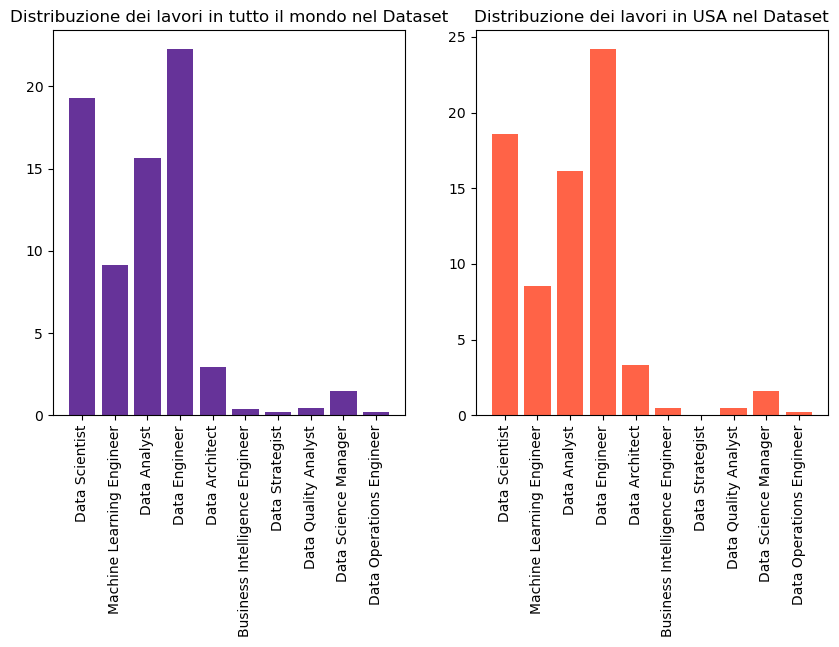

In [30]:
labels = job_titles
percentuali_mondiali = [percentuale_DataScientist_mondiali, percentuale_Machine_Learning_Engineer_mondiali, percentuale_Data_Analyst_mondiali, percentuale_Data_Engineer_mondiali, percentuale_Data_Architect_mondiali, percentuale_Business_Intelligence_Engineer_mondiali, percentuale_Data_Strategist_mondiali, percentuale_Data_Quality_Analyst_mondiali, percentuale_Data_Science_Manager_mondiali, percentuale_Data_Operations_Engineer_mondiali]
print(len(percentuali_mondiali))
plt.figure()
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].set_title("Distribuzione dei lavori in tutto il mondo nel Dataset")
axs[0].bar(labels,percentuali_mondiali, color="rebeccapurple")
axs[0].tick_params(axis='x',rotation=90)

percentuali_americani = [percentuale_DataScientist_americani, percentuale_Machine_Learning_Engineer_americani, percentuale_Data_Analyst_americani, percentuale_Data_Engineer_americani, percentuale_Data_Architect_americani, percentuale_Business_Intelligence_Engineer_americani, percentuale_Data_Strategist_americani, percentuale_Data_Quality_Analyst_americani, percentuale_Data_Science_Manager_americani, percentuale_Data_Operations_Engineer_americani]

axs[1].set_title("Distribuzione dei lavori in USA nel Dataset")
axs[1].bar(labels,percentuali_americani, color="tomato")
axs[1].tick_params(axis='x',rotation=90)

plt.show()

## FASE 5: LE CORRELAZIONI TRA TUTTE LE FEATURES E IL SALARIO (CON LA MATRICE DI CORRELAZIONE)

In [31]:
dataset.corr()["salary"]

C:\Users\matte\AppData\Local\Temp\ipykernel_23688\3704259510.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()["salary"]


salary    1.0
Name: salary, dtype: float64

NON HO DELLE VARIABILI NUMERICHE PER FARE LA CORRELAZIONE, HO SOLO DEI VALORI NUMERICI PER LA FEATURE SALARY ED è PER QUESTO CHE NON MI VIENE LA MATRICE DI CORRELAZIONE

## FASE 6: L'ANALISI DELLA PRESENZA DI NAN NEL DATASET, LA GESTIONE DI QUEST'ULTIMI ED EVENTUALI GRAFICI

In [32]:
# Calcolo del totale delle righe con dati mancanti
totale_dati_mancanti_dataset = dataset.isnull().any(axis=1).sum() # Calcola il totale delle righe con almeno un dato mancante

# Determinazione delle colonne con dati mancanti
colonne_dati_mancanti_dataset = dataset.isnull().any(axis=0) # True se almeno un valore nella colonna è mancante (None o NaN)

In [33]:
# Stampa delle colonne con dati mancanti e del totale dei dati mancanti
print("Colonne con i NaN nel Dataset originale:")
print(colonne_dati_mancanti_dataset)
print(f"Totale delle righe con i NaN nel Dataset originale: {totale_dati_mancanti_dataset}")

Colonne con i NaN nel Dataset originale:
experience_level    False
job_title           False
salary              False
company_location    False
dtype: bool
Totale delle righe con i NaN nel Dataset originale: 0


In [34]:
# Calcolo del totale delle righe con dati mancanti
totale_dati_mancanti_dataset_ridotto = dataset_ridotto.isnull().any(axis=1).sum() # Calcola il totale delle righe con almeno un dato mancante

# Determinazione delle colonne con dati mancanti
colonne_dati_mancanti_dataset_ridotto = dataset_ridotto.isnull().any(axis=0) # True se almeno un valore nella colonna è mancante (None o NaN)

In [35]:
# Stampa delle colonne con dati mancanti e del totale dei dati mancanti
print("Colonne con i NaN nel Dataset ridotto:")
print(colonne_dati_mancanti_dataset_ridotto)
print(f"Totale delle righe con i NaN nel Dataset ridotto: {totale_dati_mancanti_dataset_ridotto}")

Colonne con i NaN nel Dataset ridotto:
experience_level    False
job_title           False
salary              False
company_location    False
dtype: bool
Totale delle righe con i NaN nel Dataset ridotto: 0


## FASE 7: L'ANALISI DELLA PRESENZA DI OUTLIERS NEL DATASET, LA GESTIONE DI QUEST'ULTIMI ED EVENTUALI GRAFICI

In [36]:
# la formula della deviazione standard è: σ = √(Σ(xi - x̄)² / n)
    # √ = radice quadrata
    # Σ = sommatoria di tutti gli elementi dentro la parentesi quadra
    # xi = sono i singoli valori dei dati
    # x̄ = è la media dei dati
    # n = è il numero totale di dati

In [37]:
# Calcolare la media del Dataset
mean_value_dataset = dataset["salary"].mean()
print("La media dei valori del Dataset originario nella Feature \"salary\" è:")
print(mean_value_dataset)

La media dei valori del Dataset originario nella Feature "salary" è:
166798.63123236125


In [38]:
# Calcolare la media del Dataset ridotto
mean_value_dataset_ridotto = dataset_ridotto["salary"].mean()
print("La media dei valori del Dataset originario nella Feature \"salary\" è:")
print(mean_value_dataset_ridotto)

La media dei valori del Dataset originario nella Feature "salary" è:
160131.97462514418


In [39]:
# Calcolare la deviazione standard del Dataset
std_dev_dataset = dataset["salary"].std()
print("La deviazione standard del Dataset originario nella Feature \"salary\" è:")
print(std_dev_dataset)

La deviazione standard del Dataset originario nella Feature "salary" è:
205073.26639455935


In [40]:
# Calcolare la deviazione standard del Dataset ridotto
std_dev_dataset_ridotto = dataset_ridotto["salary"].std()
print("La deviazione standard del Dataset originario nella Feature \"salary\" è:")
print(std_dev_dataset_ridotto)

La deviazione standard del Dataset originario nella Feature "salary" è:
60578.67710373906


In [41]:
#Identifica gli outliers consiederando +3 sigma dalla media
outliers_dataset=dataset[(dataset["salary"]>mean_value_dataset+3*std_dev_dataset) | (dataset["salary"]<mean_value_dataset-3*std_dev_dataset)] # Serve per controllare la presenza effettiva di Outliers comparando se i valori della Feature "salary" si discostano di 3σ (sigma) dalla media
outliers_dataset

,experience_level,job_title,salary,company_location
156,MI,Applied Data Scientist,1700000,IN
217,EN,Data Engineer,1400000,IN
528,SE,AI Scientist,1500000,IL
735,MI,Data Scientist,1400000,IN
738,MI,Lead Data Analyst,1500000,IN
988,SE,Data Analyst,1300000,IN
998,SE,Data Science Consultant,1000000,TH
1230,EN,Data Scientist,800000,IN
1260,MI,Product Data Analyst,1350000,IN
1341,EN,Data Scientist,1050000,IN


In [42]:
#Identifica gli outliers consiederando +3 sigma dalla media
outliers_dataset_ridotto=dataset_ridotto[(dataset_ridotto["salary"]>mean_value_dataset_ridotto+3*std_dev_dataset_ridotto) | (dataset_ridotto["salary"]<mean_value_dataset_ridotto-3*std_dev_dataset_ridotto)]
outliers_dataset_ridotto

,experience_level,job_title,salary,company_location
33,SE,Computer Vision Engineer,342810,US
133,SE,Machine Learning Engineer,342300,US
478,EX,Director of Data Science,353200,US
649,SE,Data Architect,376080,US
1105,SE,Data Scientist,370000,US
1288,SE,Data Analyst,385000,US
1311,SE,Research Scientist,370000,US
1421,SE,Applied Scientist,350000,US


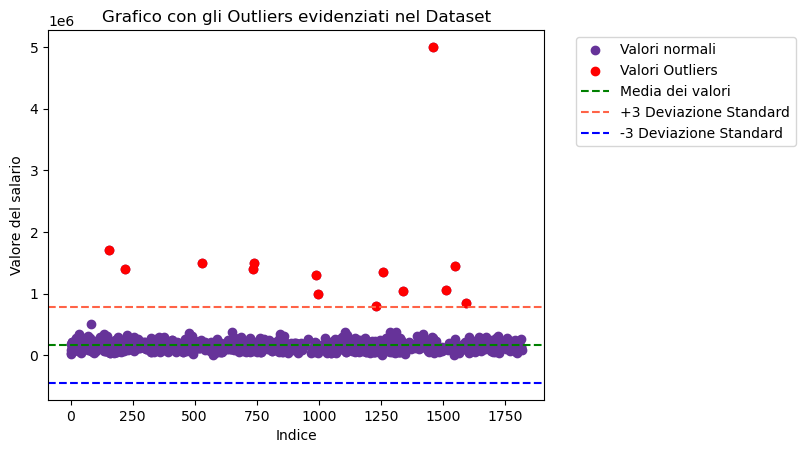

In [43]:
# Crea un grafico a dispersione
plt.scatter(dataset.index, dataset['salary'], label='Valori normali', color="rebeccapurple")

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers_dataset.index, outliers_dataset['salary'], color='red', label='Valori Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value_dataset, color='green', linestyle='--', label='Media dei valori')
plt.axhline(y=mean_value_dataset + 3 * std_dev_dataset, color='tomato', linestyle='--', label='+3 Deviazione Standard')
plt.axhline(y=mean_value_dataset - 3 * std_dev_dataset, color='blue', linestyle='--', label='-3 Deviazione Standard')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valore del salario')
plt.title('Grafico con gli Outliers evidenziati nel Dataset')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.show()

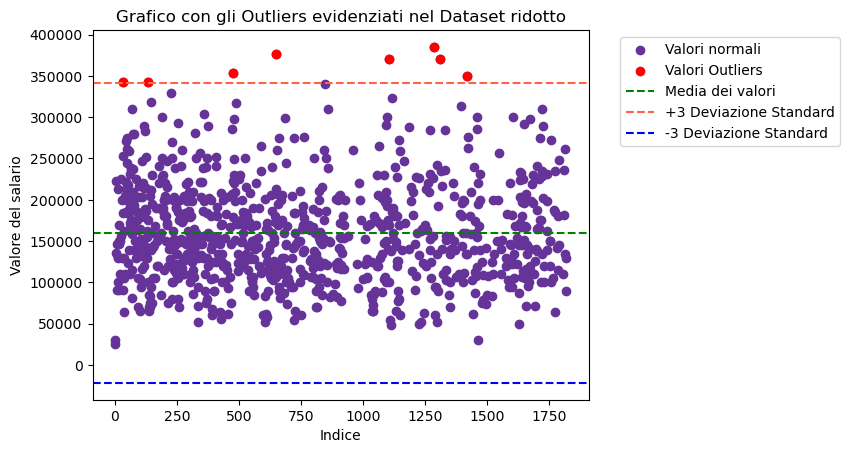

In [44]:
# Crea un grafico a dispersione
plt.scatter(dataset_ridotto.index, dataset_ridotto['salary'], label='Valori normali', color="rebeccapurple")

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers_dataset_ridotto.index, outliers_dataset_ridotto['salary'], color='red', label='Valori Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value_dataset_ridotto, color='green', linestyle='--', label='Media dei valori')
plt.axhline(y=mean_value_dataset_ridotto + 3 * std_dev_dataset_ridotto, color='tomato', linestyle='--', label='+3 Deviazione Standard')
plt.axhline(y=mean_value_dataset_ridotto - 3 * std_dev_dataset_ridotto, color='blue', linestyle='--', label='-3 Deviazione Standard')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valore del salario')
plt.title('Grafico con gli Outliers evidenziati nel Dataset ridotto')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostra il grafico
plt.show()

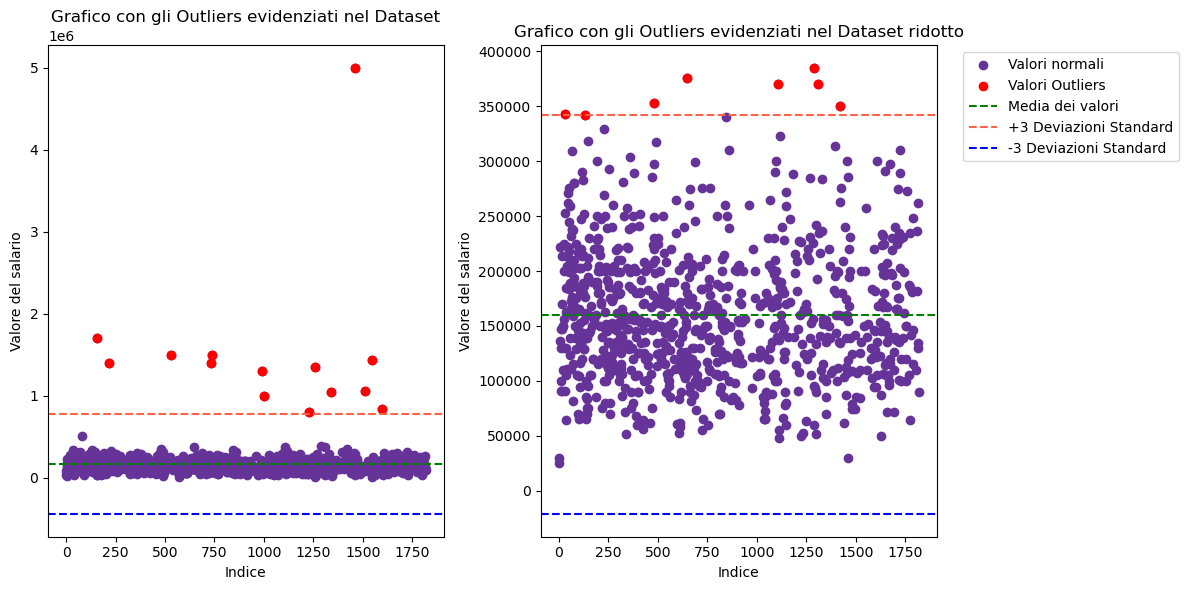

In [45]:
# Importa la libreria matplotlib
import matplotlib.pyplot as plt

# Crea una figura e due assi (subplot)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico con outliers nel dataset originale
axs[0].scatter(dataset.index, dataset['salary'], label='Valori normali', color="rebeccapurple")
axs[0].scatter(outliers_dataset.index, outliers_dataset['salary'], color='red', label='Valori Outliers')
axs[0].axhline(y=mean_value_dataset, color='green', linestyle='--', label='Media dei valori')
axs[0].axhline(y=mean_value_dataset + 3 * std_dev_dataset, color='tomato', linestyle='--', label='+3 Deviazione Standard')
axs[0].axhline(y=mean_value_dataset - 3 * std_dev_dataset, color='blue', linestyle='--', label='-3 Deviazione Standard')
axs[0].set_xlabel('Indice')
axs[0].set_ylabel('Valore del salario')
axs[0].set_title('Grafico con gli Outliers evidenziati nel Dataset')

# Grafico con outliers nel dataset ridotto
axs[1].scatter(dataset_ridotto.index, dataset_ridotto['salary'], label='Valori normali', color="rebeccapurple")
axs[1].scatter(outliers_dataset_ridotto.index, outliers_dataset_ridotto['salary'], color='red', label='Valori Outliers')
axs[1].axhline(y=mean_value_dataset_ridotto, color='green', linestyle='--', label='Media dei valori')
axs[1].axhline(y=mean_value_dataset_ridotto + 3 * std_dev_dataset_ridotto, color='tomato', linestyle='--', label='+3 Deviazioni Standard')
axs[1].axhline(y=mean_value_dataset_ridotto - 3 * std_dev_dataset_ridotto, color='blue', linestyle='--', label='-3 Deviazioni Standard')
axs[1].set_xlabel('Indice')
axs[1].set_ylabel('Valore del salario')
axs[1].set_title('Grafico con gli Outliers evidenziati nel Dataset ridotto')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Regola la disposizione e lo spazio tra i subplot
plt.tight_layout()

# Mostra i grafici
plt.show()

In [46]:
# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k = 3  # intervallo di confidenza

# Lista per salvare gli indici degli outliers
outlier_indices_dataset = []

# Calcola la media e la deviazione standard della feature "salary"
mean_salary_dataset = dataset['salary'].mean()
std_dev_salary_dataset = dataset['salary'].std()

# Identifica gli outliers per la feature "salary"
dataset['Outlier_salary'] = (dataset['salary'] > mean_salary_dataset + k * std_dev_salary_dataset) | (dataset['salary'] < mean_salary_dataset - k * std_dev_salary_dataset)

dataset

C:\Users\matte\AppData\Local\Temp\ipykernel_23688\1678530265.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Outlier_salary'] = (dataset['salary'] > mean_salary_dataset + k * std_dev_salary_dataset) | (dataset['salary'] < mean_salary_dataset - k * std_dev_salary_dataset)


,experience_level,job_title,salary,company_location,Outlier_salary
0,SE,Principal Data Scientist,80000,ES,False
1,MI,ML Engineer,30000,US,False
2,MI,ML Engineer,25500,US,False
3,SE,Data Scientist,175000,CA,False
4,SE,Data Scientist,120000,CA,False
...,...,...,...,...,...
1809,SE,Data Engineer,182000,US,False
1814,SE,Machine Learning Engineer,261500,US,False
1815,SE,Machine Learning Engineer,134500,US,False
1817,MI,Data Scientist,130000,US,False


In [47]:
# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k = 3  # intervallo di confidenza

# Lista per salvare gli indici degli outliers
outlier_indices_dataset_ridotto = []

# Calcola la media e la deviazione standard della feature "salary"
mean_salary_dataset_ridotto = dataset_ridotto['salary'].mean()
std_dev_salary_dataset_ridotto = dataset_ridotto['salary'].std()

# Identifica gli outliers per la feature "salary"
dataset_ridotto['Outlier_salary'] = (dataset_ridotto['salary'] > mean_salary_dataset_ridotto + k * std_dev_salary_dataset_ridotto) | (dataset_ridotto['salary'] < mean_salary_dataset_ridotto - k * std_dev_salary_dataset_ridotto)

dataset_ridotto

C:\Users\matte\AppData\Local\Temp\ipykernel_23688\2167628478.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ridotto['Outlier_salary'] = (dataset_ridotto['salary'] > mean_salary_dataset_ridotto + k * std_dev_salary_dataset_ridotto) | (dataset_ridotto['salary'] < mean_salary_dataset_ridotto - k * std_dev_salary_dataset_ridotto)


,experience_level,job_title,salary,company_location,Outlier_salary
1,MI,ML Engineer,30000,US,False
2,MI,ML Engineer,25500,US,False
5,SE,Applied Scientist,222200,US,False
6,SE,Applied Scientist,136000,US,False
9,SE,Data Scientist,147100,US,False
...,...,...,...,...,...
1809,SE,Data Engineer,182000,US,False
1814,SE,Machine Learning Engineer,261500,US,False
1815,SE,Machine Learning Engineer,134500,US,False
1817,MI,Data Scientist,130000,US,False


In [48]:
#Elimina le righe corrispondenti agli outliers quelli che hanno una features fuoriscala
outliers_dataset = dataset['Num_Outliers_nella_riga'] = dataset.filter(like='Outlier_').sum(axis=1) # Serve per contare quanti Outliers ci sono per ogni riga ed essendoci una sola Feature numerica il valore obblligatoriamente sarà pari a 0 o a 1, solo in questo caso
dataset

C:\Users\matte\AppData\Local\Temp\ipykernel_23688\1611520539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_dataset = dataset['Num_Outliers_nella_riga'] = dataset.filter(like='Outlier_').sum(axis=1) # Serve per contare quanti Outliers ci sono per ogni riga ed essendoci una sola Feature numerica il valore obblligatoriamente sarà pari a 0 o a 1, solo in questo caso


,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga
0,SE,Principal Data Scientist,80000,ES,False,0
1,MI,ML Engineer,30000,US,False,0
2,MI,ML Engineer,25500,US,False,0
3,SE,Data Scientist,175000,CA,False,0
4,SE,Data Scientist,120000,CA,False,0
...,...,...,...,...,...,...
1809,SE,Data Engineer,182000,US,False,0
1814,SE,Machine Learning Engineer,261500,US,False,0
1815,SE,Machine Learning Engineer,134500,US,False,0
1817,MI,Data Scientist,130000,US,False,0


In [49]:
#Elimina le righe corrispondenti agli outliers quelli che hanno una features fuoriscala
outliers_dataset_ridotto = dataset_ridotto['Num_Outliers_nella_riga'] = dataset_ridotto.filter(like='Outlier_').sum(axis=1)
dataset_ridotto

C:\Users\matte\AppData\Local\Temp\ipykernel_23688\1806719169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_dataset_ridotto = dataset_ridotto['Num_Outliers_nella_riga'] = dataset_ridotto.filter(like='Outlier_').sum(axis=1)


,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga
1,MI,ML Engineer,30000,US,False,0
2,MI,ML Engineer,25500,US,False,0
5,SE,Applied Scientist,222200,US,False,0
6,SE,Applied Scientist,136000,US,False,0
9,SE,Data Scientist,147100,US,False,0
...,...,...,...,...,...,...
1809,SE,Data Engineer,182000,US,False,0
1814,SE,Machine Learning Engineer,261500,US,False,0
1815,SE,Machine Learning Engineer,134500,US,False,0
1817,MI,Data Scientist,130000,US,False,0


In [50]:
# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers_dataset = dataset[dataset['Num_Outliers_nella_riga'] >= min_features_threshold]
outliers_dataset

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga
156,MI,Applied Data Scientist,1700000,IN,True,1
217,EN,Data Engineer,1400000,IN,True,1
528,SE,AI Scientist,1500000,IL,True,1
735,MI,Data Scientist,1400000,IN,True,1
738,MI,Lead Data Analyst,1500000,IN,True,1
988,SE,Data Analyst,1300000,IN,True,1
998,SE,Data Science Consultant,1000000,TH,True,1
1230,EN,Data Scientist,800000,IN,True,1
1260,MI,Product Data Analyst,1350000,IN,True,1
1341,EN,Data Scientist,1050000,IN,True,1


In [51]:
# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers_dataset_ridotto = dataset_ridotto[dataset_ridotto['Num_Outliers_nella_riga'] >= min_features_threshold]
outliers_dataset_ridotto

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga
33,SE,Computer Vision Engineer,342810,US,True,1
133,SE,Machine Learning Engineer,342300,US,True,1
478,EX,Director of Data Science,353200,US,True,1
649,SE,Data Architect,376080,US,True,1
1105,SE,Data Scientist,370000,US,True,1
1288,SE,Data Analyst,385000,US,True,1
1311,SE,Research Scientist,370000,US,True,1
1421,SE,Applied Scientist,350000,US,True,1


In [52]:
dataset_filtered = dataset[dataset['Outlier_salary'] == False]
dataset_filtered

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga
0,SE,Principal Data Scientist,80000,ES,False,0
1,MI,ML Engineer,30000,US,False,0
2,MI,ML Engineer,25500,US,False,0
3,SE,Data Scientist,175000,CA,False,0
4,SE,Data Scientist,120000,CA,False,0
...,...,...,...,...,...,...
1809,SE,Data Engineer,182000,US,False,0
1814,SE,Machine Learning Engineer,261500,US,False,0
1815,SE,Machine Learning Engineer,134500,US,False,0
1817,MI,Data Scientist,130000,US,False,0


In [53]:
dataset_ridotto_filtered = dataset_ridotto[dataset_ridotto['Outlier_salary'] == False]
dataset_ridotto_filtered

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga
1,MI,ML Engineer,30000,US,False,0
2,MI,ML Engineer,25500,US,False,0
5,SE,Applied Scientist,222200,US,False,0
6,SE,Applied Scientist,136000,US,False,0
9,SE,Data Scientist,147100,US,False,0
...,...,...,...,...,...,...
1809,SE,Data Engineer,182000,US,False,0
1814,SE,Machine Learning Engineer,261500,US,False,0
1815,SE,Machine Learning Engineer,134500,US,False,0
1817,MI,Data Scientist,130000,US,False,0


In [54]:
# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers_dataset_filtered = dataset_filtered[dataset_filtered['Num_Outliers_nella_riga'] >= min_features_threshold]
outliers_dataset_filtered

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga


In [55]:
# Filtra i dati per mantenere solo le righe con almeno il numero minimo di features superanti la soglia
outliers_dataset_ridotto_filtered = dataset_ridotto_filtered[dataset_ridotto_filtered['Num_Outliers_nella_riga'] >= min_features_threshold]
outliers_dataset_ridotto_filtered

,experience_level,job_title,salary,company_location,Outlier_salary,Num_Outliers_nella_riga


In [56]:
print(dataset.shape)
print(dataset_filtered.shape)
print(dataset_ridotto.shape)
print(dataset_ridotto_filtered.shape)

(1063, 6)
(1049, 6)
(867, 6)
(859, 6)


In [57]:
dataset=dataset_filtered
dataset_ridotto=dataset_ridotto_filtered

In [58]:
# Rimuovi colonne ausiliarie
dataset.drop(dataset.filter(like='Outlier_').columns, axis=1, inplace=True) # Questo serve per filtrare e succesivamente elimanare tutte quelle Feature che iniziano con quel determinato suffiso, che nel caso del Dataset in questione è "salary" che è l'unica Feature numerica
dataset.drop('Num_Outliers_nella_riga', axis=1, inplace=True) # Drop vuol dire buttare, quindi elimina in questo caso una Feature mentre axis pari a 1 indica una Feature e infine "inplace" indica che il Dataset viene sovrascritto con le nuove modifiche
dataset

C:\Users\matte\AppData\Local\Temp\ipykernel_23688\1542602447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(dataset.filter(like='Outlier_').columns, axis=1, inplace=True) # Questo serve per filtrare e succesivamente elimanare tutte quelle Feature che iniziano con quel determinato suffiso, che nel caso del Dataset in questione è "salary" che è l'unica Feature numerica
C:\Users\matte\AppData\Local\Temp\ipykernel_23688\1542602447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('Num_Outliers_nella_riga', axis=1, inplace=True) # Drop vuol dire buttare, quindi elimina in questo caso una Fea

,experience_level,job_title,salary,company_location
0,SE,Principal Data Scientist,80000,ES
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
3,SE,Data Scientist,175000,CA
4,SE,Data Scientist,120000,CA
...,...,...,...,...
1809,SE,Data Engineer,182000,US
1814,SE,Machine Learning Engineer,261500,US
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US


In [59]:
# Rimuovi colonne ausiliarie
dataset_ridotto.drop(dataset_ridotto.filter(like='Outlier_').columns, axis=1, inplace=True)
dataset_ridotto.drop('Num_Outliers_nella_riga', axis=1, inplace=True)
dataset_ridotto

C:\Users\matte\AppData\Local\Temp\ipykernel_23688\3394655298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ridotto.drop(dataset_ridotto.filter(like='Outlier_').columns, axis=1, inplace=True)
C:\Users\matte\AppData\Local\Temp\ipykernel_23688\3394655298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ridotto.drop('Num_Outliers_nella_riga', axis=1, inplace=True)


,experience_level,job_title,salary,company_location
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
5,SE,Applied Scientist,222200,US
6,SE,Applied Scientist,136000,US
9,SE,Data Scientist,147100,US
...,...,...,...,...
1809,SE,Data Engineer,182000,US
1814,SE,Machine Learning Engineer,261500,US
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US


In [60]:
dataset

,experience_level,job_title,salary,company_location
0,SE,Principal Data Scientist,80000,ES
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
3,SE,Data Scientist,175000,CA
4,SE,Data Scientist,120000,CA
...,...,...,...,...
1809,SE,Data Engineer,182000,US
1814,SE,Machine Learning Engineer,261500,US
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US


In [61]:
dataset_ridotto

,experience_level,job_title,salary,company_location
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
5,SE,Applied Scientist,222200,US
6,SE,Applied Scientist,136000,US
9,SE,Data Scientist,147100,US
...,...,...,...,...
1809,SE,Data Engineer,182000,US
1814,SE,Machine Learning Engineer,261500,US
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US


## FASE 8: LO SCALING ED ENCODING DEI DATI NELLE FEATURE (CON I GRAFICI)

### LE OPERAZIONI PRELIMINARI

In [62]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Escludi le colonne non numeriche dal DataFrame
Feature_numeriche_dataset = dataset.select_dtypes(include=['number']).columns
dataset_Feature_numeriche = dataset[Feature_numeriche_dataset]

dataset_Feature_numeriche

,salary
0,80000
1,30000
2,25500
3,175000
4,120000
...,...
1809,182000
1814,261500
1815,134500
1817,130000


In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Escludi le colonne non numeriche dal DataFrame
Feature_numeriche_dataset_ridotto = dataset_ridotto.select_dtypes(include=['number']).columns
dataset_ridotto_Feature_numeriche = dataset_ridotto[Feature_numeriche_dataset_ridotto]

dataset_ridotto_Feature_numeriche

,salary
1,30000
2,25500
5,222200
6,136000
9,147100
...,...
1809,182000
1814,261500
1815,134500
1817,130000


### IL MIN-MAX SCALING

Il Min-Max scaling acquisisce il valore Max (il più alto valore della Feature "salary" in questo caso) e gli cambia il valore a 1. Dopo acquisisce il valore Min, quindi quello minimo sempre della Feature "salary", e lo transforma in 0. Infine gli altri valori vengono scalati tra 0 e 1 (esclusi)

La sua formula vera e propria è:

x_scalata = (x - valore_minimo_di_x)/(valore_massimo_di_x - valore_minimo_di_x)

In [64]:
# Min-Max scaling solo delle colonne numeriche
min_max_scaling_dataset = MinMaxScaler()
min_max_scaling_dati_dataset = min_max_scaling_dataset.fit_transform(dataset_Feature_numeriche)
min_max_scaling_dataset_numerico = pd.DataFrame(min_max_scaling_dati_dataset, columns=dataset_Feature_numeriche.columns)

# Per provare l'effettiva riuscita dello Min Max Scaling bisogna ricavare i primi numeri maggiori e minori del nuovo Dataset
min_row_dataset = min_max_scaling_dataset_numerico.iloc[min_max_scaling_dataset_numerico.min(axis=1).idxmin()] # Utilizzare il metodo iloc per indicare una riga o una Feature del DataFrame, in questo caso non si può indicare direttamente il numero ma attraverso il comando min si riesce a ricavare il numero minore del Dataset mentre con idxmin si indica che dev'essere il primo di nunmero minore nel Dataset
max_row_dataset = min_max_scaling_dataset_numerico.iloc[min_max_scaling_dataset_numerico.max(axis=1).idxmax()]
min_max_scaling_dataset_numerico

,salary
0,0.145129
1,0.045726
2,0.036779
3,0.333996
4,0.224652
...,...
1044,0.347913
1045,0.505964
1046,0.253479
1047,0.244533


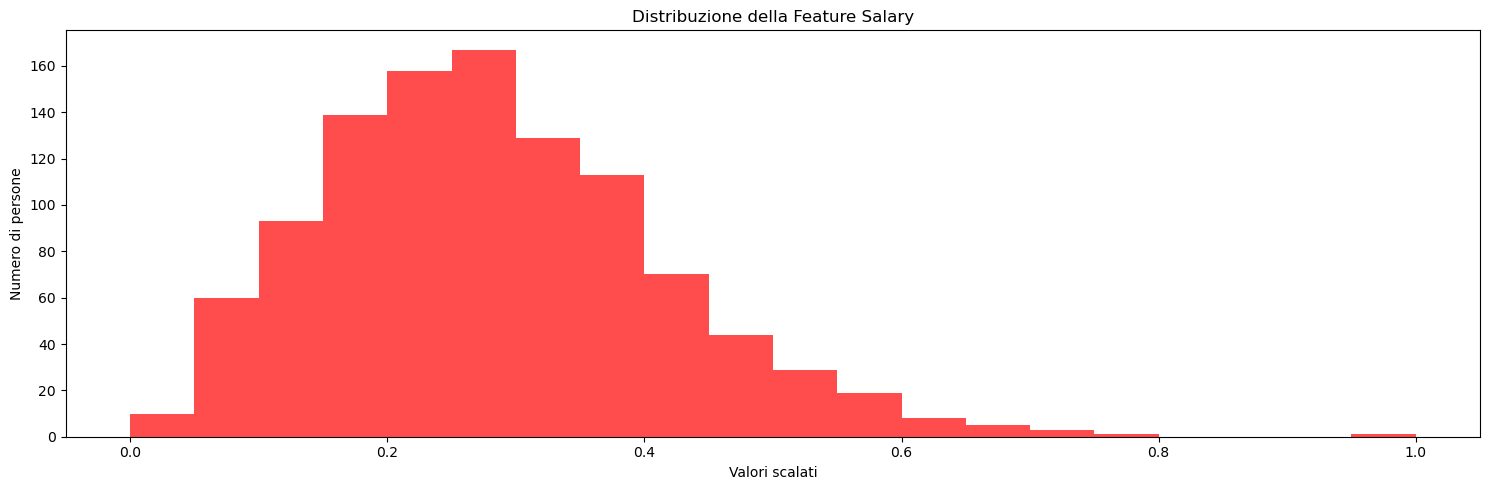

In [65]:
import matplotlib.pyplot as plt

colori=["red"]

# Creazione dei subplot per gli istogrammi
fig, axes = plt.subplots(nrows=1, ncols=len(min_max_scaling_dataset_numerico.columns), figsize=(15, 5))

# Se c'è solo una colonna, axes non sarà una lista, quindi lo mettiamo in una lista per iterare comunque
if len(min_max_scaling_dataset_numerico.columns) == 1:
    axes = [axes]

# Loop attraverso le colonne per disegnare gli istogrammi
for i, col in enumerate(min_max_scaling_dataset_numerico.columns):
    axes[i].hist(min_max_scaling_dataset_numerico[col], bins=20, alpha=0.7, color=colori)
    axes[i].set_title('Distribuzione della Feature Salary')   # Imposta il titolo
    axes[i].set_xlabel('Valori scalati')           # Imposta l'etichetta sull'asse x
    axes[i].set_ylabel('Numero di persone')        # Imposta l'etichetta sull'asse y

plt.tight_layout()
plt.show()

In [66]:
# Min-Max scaling solo delle colonne numeriche
min_max_scaling_dataset_ridotto = MinMaxScaler()
min_max_scaling_dati_dataset_ridotto = min_max_scaling_dataset_ridotto.fit_transform(dataset_ridotto_Feature_numeriche)
min_max_scaling_dataset_ridotto_numerico = pd.DataFrame(min_max_scaling_dati_dataset_ridotto, columns=dataset_Feature_numeriche.columns)

# Per provare l'effettiva riuscita dello Min Max Scaling bisogna ricavare i primi numeri maggiori e minori del nuovo Dataset
min_row_dataset_ridotto = min_max_scaling_dataset_ridotto_numerico.iloc[min_max_scaling_dataset_ridotto_numerico.min(axis=1).idxmin()] # Utilizzare il metodo iloc per indicare una riga o una Feature del DataFrame, in questo caso non si può indicare direttamente il numero ma attraverso il comando min si riesce a ricavare il numero minore del Dataset mentre con idxmin si indica che dev'essere il primo di nunmero minore nel Dataset
max_row_dataset_ridotto = min_max_scaling_dataset_ridotto_numerico.iloc[min_max_scaling_dataset_ridotto_numerico.max(axis=1).idxmax()]
min_max_scaling_dataset_ridotto_numerico

,salary
0,0.014308
1,0.000000
2,0.625437
3,0.351351
4,0.386645
...,...
854,0.497615
855,0.750397
856,0.346582
857,0.332273


In [67]:
print("Il valore minimo è:")
print(min_row_dataset_ridotto) # Il valore minimo
print("Il valore massimo è:")
print(max_row_dataset_ridotto) # Il valore massimo

Il valore minimo è:
salary    0.0
Name: 1, dtype: float64
Il valore massimo è:
salary    1.0
Name: 512, dtype: float64


In [68]:
print("Il valore minimo è:")
print(min_row_dataset) # Il valore minimo
print("Il valore massimo è:")
print(max_row_dataset) # Il valore massimo

Il valore minimo è:
salary    0.0
Name: 429, dtype: float64
Il valore massimo è:
salary    1.0
Name: 79, dtype: float64


In [69]:
print("Informazioni sulla riga del valore minimo:")
print(min_max_scaling_dataset_ridotto_numerico.iloc[1]) # Utilizzare il metodo iloc per indicare il numero o il nome di una riga o di una Feature del DataFrame
print("Informazioni sulla riga del valore massimo:")
print(min_max_scaling_dataset_ridotto_numerico.iloc[512])

Informazioni sulla riga del valore minimo:
salary    0.0
Name: 1, dtype: float64
Informazioni sulla riga del valore massimo:
salary    1.0
Name: 512, dtype: float64


In [70]:
print("Informazioni sulla riga del valore minimo:")
print(min_max_scaling_dataset_numerico.iloc[563]) # Utilizzare il metodo iloc per indicare il numero o il nome di una riga o di una Feature del DataFrame
print("Informazioni sulla riga del valore massimo:")
print(min_max_scaling_dataset_numerico.iloc[79])

Informazioni sulla riga del valore minimo:
salary    0.236581
Name: 563, dtype: float64
Informazioni sulla riga del valore massimo:
salary    1.0
Name: 79, dtype: float64


### LO Z-SCORE SCALING O LO STANDARD SCALING

Lo Z-score scaling o Standard scaling scala i valori usando la media dei valori e la deviazione standard applicando la seguente formula:

x_scalata = (x - valore_medio_di_x)/deviazione_standard_di_x

In [71]:
# Z-score scaling
standard_scaling_dataset = StandardScaler()
standard_scaling_dataset_dati = standard_scaling_dataset.fit_transform(dataset_Feature_numeriche)
standard_scaling_dataset_numerico = pd.DataFrame(standard_scaling_dataset_dati, columns=dataset_Feature_numeriche.columns)

standard_scaling_dataset_numerico

,salary
0,-1.039452
1,-1.796170
2,-1.864275
3,0.398313
4,-0.434077
...,...
1044,0.504254
1045,1.707436
1046,-0.214629
1047,-0.282733


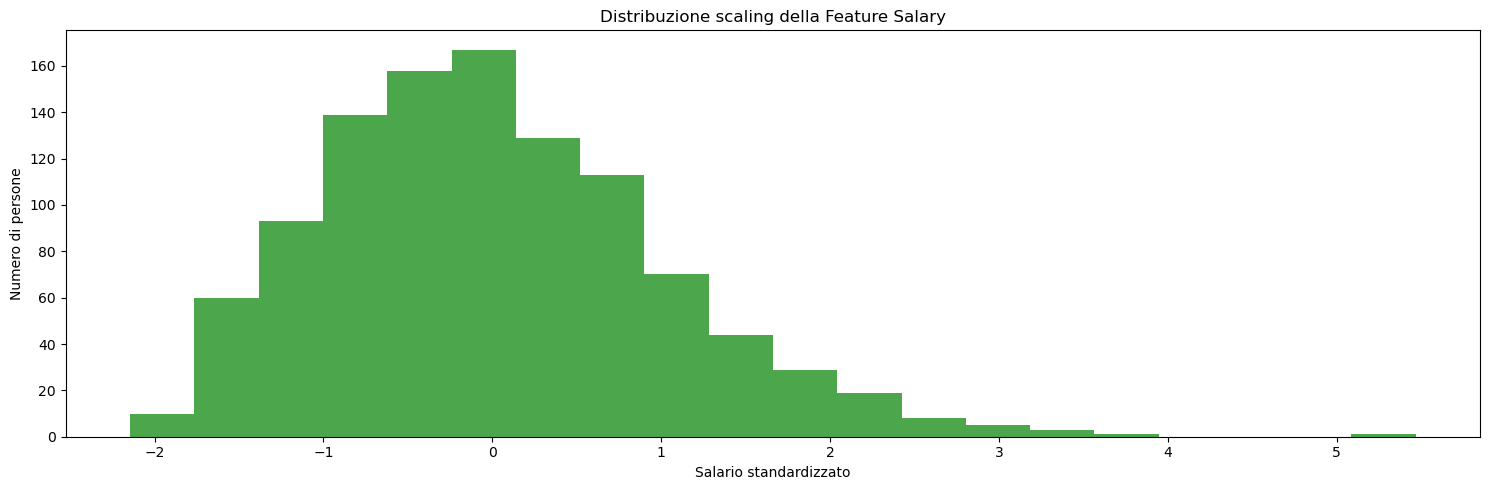

In [72]:
import matplotlib.pyplot as plt

colori=["green"]

# Numero di colonne nel DataFrame
num_cols_dataset = len(standard_scaling_dataset_numerico.columns)

# Creazione dei subplot per gli istogrammi
fig, axes = plt.subplots(nrows=1, ncols=num_cols_dataset, figsize=(15, 5))

# Se c'è solo una colonna, axes non sarà una lista, quindi lo mettiamo in una lista per iterare comunque
if num_cols_dataset == 1:
    axes = [axes]

# Loop attraverso le colonne per disegnare gli istogrammi
for i, col in enumerate(standard_scaling_dataset_numerico.columns):
    axes[i].hist(standard_scaling_dataset_numerico[col], bins=20, alpha=0.7, color=colori)
    axes[i].set_title(col)
    axes[i].set_title('Distribuzione scaling della Feature Salary')   # Imposta il titolo
    axes[i].set_xlabel('Salario standardizzato')    # Imposta l'etichetta sull'asse x
    axes[i].set_ylabel('Numero di persone')         # Imposta l'etichetta sull'asse y

plt.tight_layout()
plt.show()

In [73]:
# Z-score scaling
standard_scaling_dataset_ridotto = StandardScaler()
standard_scaling_dataset_ridotto_dati = standard_scaling_dataset_ridotto.fit_transform(dataset_ridotto_Feature_numeriche)
standard_scaling_dataset_ridotto_numerico = pd.DataFrame(standard_scaling_dataset_ridotto_dati, columns=dataset_ridotto_Feature_numeriche.columns)

standard_scaling_dataset_ridotto_numerico

,salary
0,-2.226773
1,-2.304900
2,1.110097
3,-0.386460
4,-0.193748
...,...
854,0.412167
855,1.792402
856,-0.412502
857,-0.490628


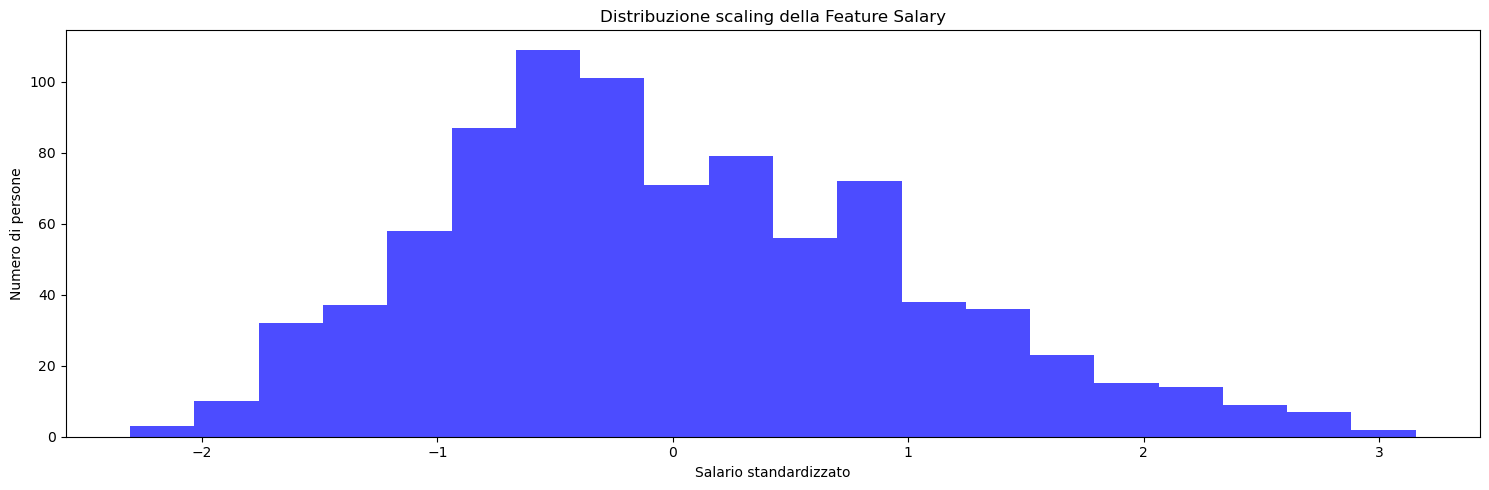

In [74]:
import matplotlib.pyplot as plt

colori=["blue"]

# Numero di colonne nel DataFrame
num_cols_dataset_ridotto = len(standard_scaling_dataset_ridotto_numerico.columns)

# Creazione dei subplot per gli istogrammi
fig, axes = plt.subplots(nrows=1, ncols=num_cols_dataset_ridotto, figsize=(15, 5))

# Se c'è solo una colonna, axes non sarà una lista, quindi lo mettiamo in una lista per iterare comunque
if num_cols_dataset_ridotto == 1:
    axes = [axes]

# Loop attraverso le colonne per disegnare gli istogrammi
for i, col in enumerate(standard_scaling_dataset_ridotto_numerico.columns):
    axes[i].hist(standard_scaling_dataset_ridotto_numerico[col], bins=20, alpha=0.7, color=colori)
    axes[i].set_title('Distribuzione scaling della Feature Salary')   # Imposta il titolo
    axes[i].set_xlabel('Salario standardizzato')    # Imposta l'etichetta sull'asse x
    axes[i].set_ylabel('Numero di persone')         # Imposta l'etichetta sull'asse y

plt.tight_layout()
plt.show()

### IL ROBUST SCALING

Il Robust scaling scala i dati in modo che possano essere confrontati tra di loro senza essere influenzati da Outliers, questo può essere utile quando nel Dataset a cui si sta lavorando esistono degli Outliers che però non sono stati precedemente eliminati o gestiti. Il Robust scaling quindi riesce a scalare i dati senza che gli Outliers presenti possano "sballare" lo scaling, come invece sarebbe successo nei casi precedenti con le altre tipologie di scaling se non si gestisce prima gli Outliers presenti nel Dataset

In [75]:
# Robust scaling
robust_scaling = RobustScaler()
robust_scaling_dati = robust_scaling.fit_transform(dataset_Feature_numeriche)
robust_scaling_dataset_numerico = pd.DataFrame(robust_scaling_dati, columns=dataset_Feature_numeriche.columns)

robust_scaling_dataset_numerico

,salary
0,-0.718424
1,-1.297798
2,-1.349942
3,0.382387
4,-0.254925
...,...
1044,0.463499
1045,1.384705
1046,-0.086906
1047,-0.139050


### L'ENCODING ONE HOT

In [76]:
# Applichiamo l'encoding One-Hot
dataset_encoding = pd.get_dummies(dataset, columns=['experience_level'])

# Visualizziamo il DataFrame dopo l'encoding
dataset_encoding

,job_title,salary,company_location,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
0,Principal Data Scientist,80000,ES,0,0,0,1
1,ML Engineer,30000,US,0,0,1,0
2,ML Engineer,25500,US,0,0,1,0
3,Data Scientist,175000,CA,0,0,0,1
4,Data Scientist,120000,CA,0,0,0,1
...,...,...,...,...,...,...,...
1809,Data Engineer,182000,US,0,0,0,1
1814,Machine Learning Engineer,261500,US,0,0,0,1
1815,Machine Learning Engineer,134500,US,0,0,0,1
1817,Data Scientist,130000,US,0,0,1,0


In [77]:
# Applichiamo l'encoding One-Hot
dataset_encoding = pd.get_dummies(dataset, columns=['job_title'])

# Visualizziamo il DataFrame dopo l'encoding
dataset_encoding

,experience_level,salary,company_location,job_title_AI Developer,job_title_AI Programmer,job_title_AI Scientist,job_title_Analytics Engineer,job_title_Applied Data Scientist,job_title_Applied Machine Learning Engineer,job_title_Applied Machine Learning Scientist,...,job_title_Machine Learning Infrastructure Engineer,job_title_Machine Learning Research Engineer,job_title_Machine Learning Researcher,job_title_Machine Learning Scientist,job_title_Machine Learning Software Engineer,job_title_NLP Engineer,job_title_Principal Data Scientist,job_title_Research Engineer,job_title_Research Scientist,job_title_Software Data Engineer
0,SE,80000,ES,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,MI,30000,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,MI,25500,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SE,175000,CA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SE,120000,CA,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,SE,182000,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1814,SE,261500,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1815,SE,134500,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1817,MI,130000,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Applichiamo l'encoding One-Hot
dataset_encoding = pd.get_dummies(dataset, columns=['company_location'])

# Visualizziamo il DataFrame dopo l'encoding
dataset_encoding

,experience_level,job_title,salary,company_location_AM,company_location_AU,company_location_BA,company_location_BR,company_location_CA,company_location_CF,company_location_CH,...,company_location_NG,company_location_NL,company_location_PT,company_location_RO,company_location_SE,company_location_SG,company_location_SI,company_location_UA,company_location_US,company_location_VN
0,SE,Principal Data Scientist,80000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,MI,ML Engineer,30000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,MI,ML Engineer,25500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,SE,Data Scientist,175000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SE,Data Scientist,120000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,SE,Data Engineer,182000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1814,SE,Machine Learning Engineer,261500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1815,SE,Machine Learning Engineer,134500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1817,MI,Data Scientist,130000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
# Applichiamo l'encoding One-Hot
dataset_ridotto_encoding = pd.get_dummies(dataset_ridotto, columns=['experience_level'])

# Visualizziamo il DataFrame dopo l'encoding
dataset_ridotto_encoding

,job_title,salary,company_location,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE
1,ML Engineer,30000,US,0,0,1,0
2,ML Engineer,25500,US,0,0,1,0
5,Applied Scientist,222200,US,0,0,0,1
6,Applied Scientist,136000,US,0,0,0,1
9,Data Scientist,147100,US,0,0,0,1
...,...,...,...,...,...,...,...
1809,Data Engineer,182000,US,0,0,0,1
1814,Machine Learning Engineer,261500,US,0,0,0,1
1815,Machine Learning Engineer,134500,US,0,0,0,1
1817,Data Scientist,130000,US,0,0,1,0


In [80]:
# Applichiamo l'encoding One-Hot
dataset_ridotto_encoding = pd.get_dummies(dataset_ridotto, columns=['job_title'])

# Visualizziamo il DataFrame dopo l'encoding
dataset_ridotto_encoding

,experience_level,salary,company_location,job_title_AI Developer,job_title_Analytics Engineer,job_title_Applied Machine Learning Engineer,job_title_Applied Machine Learning Scientist,job_title_Applied Scientist,job_title_BI Analyst,job_title_BI Data Engineer,...,job_title_Lead Data Analyst,job_title_ML Engineer,job_title_MLOps Engineer,job_title_Machine Learning Engineer,job_title_Machine Learning Infrastructure Engineer,job_title_Machine Learning Scientist,job_title_Machine Learning Software Engineer,job_title_NLP Engineer,job_title_Research Engineer,job_title_Research Scientist
1,MI,30000,US,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,MI,25500,US,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,SE,222200,US,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,SE,136000,US,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,SE,147100,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,SE,182000,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1814,SE,261500,US,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1815,SE,134500,US,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1817,MI,130000,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# Applichiamo l'encoding One-Hot
dataset_ridotto_encoding = pd.get_dummies(dataset_ridotto, columns=['company_location'])

# Visualizziamo il DataFrame dopo l'encoding
dataset_ridotto_encoding

,experience_level,job_title,salary,company_location_US
1,MI,ML Engineer,30000,1
2,MI,ML Engineer,25500,1
5,SE,Applied Scientist,222200,1
6,SE,Applied Scientist,136000,1
9,SE,Data Scientist,147100,1
...,...,...,...,...
1809,SE,Data Engineer,182000,1
1814,SE,Machine Learning Engineer,261500,1
1815,SE,Machine Learning Engineer,134500,1
1817,MI,Data Scientist,130000,1


### LO SCALING SALVATO NEL DATASET

In [82]:
dataset_ridotto["salary"]=min_max_scaling_dataset_numerico["salary"]

C:\Users\matte\AppData\Local\Temp\ipykernel_23688\1576787027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ridotto["salary"]=min_max_scaling_dataset_numerico["salary"]


In [83]:
dataset_ridotto

,experience_level,job_title,salary,company_location
1,MI,ML Engineer,0.045726,US
2,MI,ML Engineer,0.036779,US
5,SE,Applied Scientist,0.427833,US
6,SE,Applied Scientist,0.256461,US
9,SE,Data Scientist,0.278529,US
...,...,...,...,...
1809,SE,Data Engineer,NaN,US
1814,SE,Machine Learning Engineer,NaN,US
1815,SE,Machine Learning Engineer,NaN,US
1817,MI,Data Scientist,NaN,US


In [84]:
# Calcolo del totale delle righe con dati mancanti
totale_dati_mancanti_dataset_ridotto = dataset_ridotto.isnull().any(axis=1).sum() # Calcola il totale delle righe con almeno un dato mancante

# Determinazione delle colonne con dati mancanti
colonne_dati_mancanti_dataset_ridotto = dataset_ridotto.isnull().any(axis=0) # True se almeno un valore nella colonna è mancante (None o NaN)

In [85]:
# Stampa delle colonne con dati mancanti e del totale dei dati mancanti
print("Colonne con i NaN nel Dataset ridotto dopo il Min-Max Scaling:")
print(colonne_dati_mancanti_dataset_ridotto)
print(f"Totale delle righe con i NaN nel Dataset ridotto dopo il Min-Max Scaling: {totale_dati_mancanti_dataset_ridotto}")

Colonne con i NaN nel Dataset ridotto dopo il Min-Max Scaling:
experience_level    False
job_title           False
salary               True
company_location    False
dtype: bool
Totale delle righe con i NaN nel Dataset ridotto dopo il Min-Max Scaling: 287


In [86]:
# Visualizzare solo i valori mancanti nella feature specificata
dati_mancanti_salary = dataset_ridotto[dataset_ridotto['salary'].isnull()]

# Stampare i valori mancanti della feature specificata
dati_mancanti_salary

,experience_level,job_title,salary,company_location
1054,SE,Data Science Manager,NaN,US
1055,SE,Data Science Manager,NaN,US
1056,SE,Data Analyst,NaN,US
1061,SE,Data Manager,NaN,US
1062,SE,Machine Learning Infrastructure Engineer,NaN,US
...,...,...,...,...
1809,SE,Data Engineer,NaN,US
1814,SE,Machine Learning Engineer,NaN,US
1815,SE,Machine Learning Engineer,NaN,US
1817,MI,Data Scientist,NaN,US


In [87]:
len(dati_mancanti_salary)

287

In [88]:
# Riempire i valori mancanti nella colonna 'salary' con la media
dataset_ridotto['salary'] = dataset_ridotto['salary'].fillna(dataset_ridotto['salary'].mean(numeric_only=True))

# Stampare il DataFrame con i valori mancanti corretti
dataset_ridotto

C:\Users\matte\AppData\Local\Temp\ipykernel_23688\396318002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ridotto['salary'] = dataset_ridotto['salary'].fillna(dataset_ridotto['salary'].mean(numeric_only=True))


,experience_level,job_title,salary,company_location
1,MI,ML Engineer,0.045726,US
2,MI,ML Engineer,0.036779,US
5,SE,Applied Scientist,0.427833,US
6,SE,Applied Scientist,0.256461,US
9,SE,Data Scientist,0.278529,US
...,...,...,...,...
1809,SE,Data Engineer,0.286419,US
1814,SE,Machine Learning Engineer,0.286419,US
1815,SE,Machine Learning Engineer,0.286419,US
1817,MI,Data Scientist,0.286419,US


In [89]:
# Visualizzare solo i valori mancanti nella feature specificata
dati_mancanti_salary = dataset_ridotto[dataset_ridotto['salary'].isnull()]

# Stampare i valori mancanti della feature specificata
dati_mancanti_salary

,experience_level,job_title,salary,company_location


## FASE 9: LO SPLITTING DATASET

In [90]:
dataset

,experience_level,job_title,salary,company_location
0,SE,Principal Data Scientist,80000,ES
1,MI,ML Engineer,30000,US
2,MI,ML Engineer,25500,US
3,SE,Data Scientist,175000,CA
4,SE,Data Scientist,120000,CA
...,...,...,...,...
1809,SE,Data Engineer,182000,US
1814,SE,Machine Learning Engineer,261500,US
1815,SE,Machine Learning Engineer,134500,US
1817,MI,Data Scientist,130000,US


In [91]:
dataset_ridotto

,experience_level,job_title,salary,company_location
1,MI,ML Engineer,0.045726,US
2,MI,ML Engineer,0.036779,US
5,SE,Applied Scientist,0.427833,US
6,SE,Applied Scientist,0.256461,US
9,SE,Data Scientist,0.278529,US
...,...,...,...,...
1809,SE,Data Engineer,0.286419,US
1814,SE,Machine Learning Engineer,0.286419,US
1815,SE,Machine Learning Engineer,0.286419,US
1817,MI,Data Scientist,0.286419,US


In [92]:
dataset=dataset_ridotto

In [93]:
dataset

,experience_level,job_title,salary,company_location
1,MI,ML Engineer,0.045726,US
2,MI,ML Engineer,0.036779,US
5,SE,Applied Scientist,0.427833,US
6,SE,Applied Scientist,0.256461,US
9,SE,Data Scientist,0.278529,US
...,...,...,...,...
1809,SE,Data Engineer,0.286419,US
1814,SE,Machine Learning Engineer,0.286419,US
1815,SE,Machine Learning Engineer,0.286419,US
1817,MI,Data Scientist,0.286419,US


In [94]:
import numpy as np
from sklearn.model_selection import train_test_split # in questo caso viene solo importata una parte di libreria poichè è strettamente necessaria quella determinata funzione

valori_salary = dataset["salary"]
valori_salary

1       0.045726
2       0.036779
5       0.427833
6       0.256461
9       0.278529
          ...   
1809    0.286419
1814    0.286419
1815    0.286419
1817    0.286419
1818    0.286419
Name: salary, Length: 859, dtype: float64

In [95]:
valori_job_title = dataset["job_title"]
valori_job_title

1                     ML Engineer
2                     ML Engineer
5               Applied Scientist
6               Applied Scientist
9                  Data Scientist
                  ...            
1809                Data Engineer
1814    Machine Learning Engineer
1815    Machine Learning Engineer
1817               Data Scientist
1818               Data Scientist
Name: job_title, Length: 859, dtype: object

In [96]:
# Suddividere il dataset in training set (70%) e test set (30%) formando due DataSet
X_train, X_test, y_train, y_test = train_test_split(valori_salary, valori_job_title, test_size=0.3, random_state=42) # la formula è: le X sono i valori del salary perchè sono le Feature del DataSet, cioè l'input. Invece le Y sono gli output o target del DataSet, cioè i valori del job title. "test_size=0.3" vuol dire che il DataSet di Test è il 30% di quello totale mentre random_state sceglie in modo randomico i valori del DataSet per il Training e il Test
# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (valori di \"salary\" e valori \"job_title\"):", X_train.shape, y_train.shape) # shape = dimensione dei DataSet di Training
print("Dimensioni del Test Set (valori di \"salary\" e valori \"job_title\"):", X_test.shape, y_test.shape) # shape = dimensione dei DataSet di Test

Dimensioni del Training Set (valori di "salary" e valori "job_title"): (601,) (601,)
Dimensioni del Test Set (valori di "salary" e valori "job_title"): (258,) (258,)


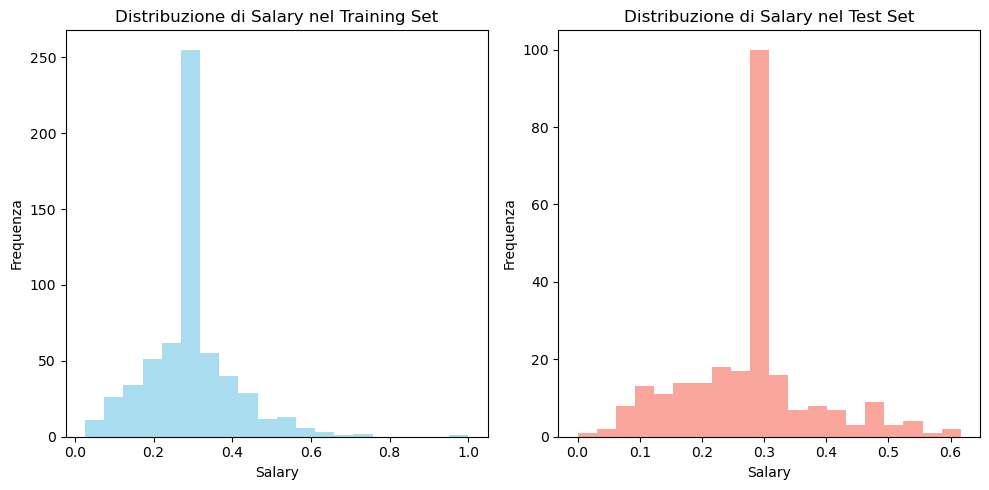

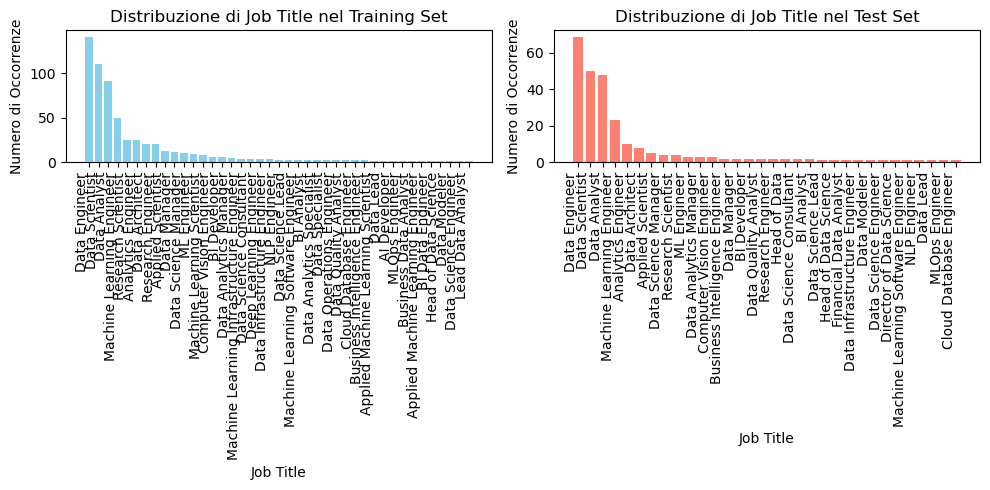

In [98]:
import matplotlib.pyplot as plt

# Visualizzare le distribuzioni dei valori di 'salary' nel training set e nel test set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X_train, bins=20, color='skyblue', alpha=0.7)
plt.title('Distribuzione di Salary nel Training Set')
plt.xlabel('Salary')
plt.ylabel('Frequenza')

plt.subplot(1, 2, 2)
plt.hist(X_test, bins=20, color='salmon', alpha=0.7)
plt.title('Distribuzione di Salary nel Test Set')
plt.xlabel('Salary')
plt.ylabel('Frequenza')

plt.tight_layout()
plt.show()

# Visualizzare la distribuzione dei valori di 'job_title' nel training set e nel test set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(y_train.value_counts().index, y_train.value_counts().values, color='skyblue')
plt.title('Distribuzione di Job Title nel Training Set')
plt.xlabel('Job Title')
plt.ylabel('Numero di Occorrenze')
plt.xticks(rotation=90, ha='right')

plt.subplot(1, 2, 2)
plt.bar(y_test.value_counts().index, y_test.value_counts().values, color='salmon')
plt.title('Distribuzione di Job Title nel Test Set')
plt.xlabel('Job Title')
plt.ylabel('Numero di Occorrenze')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()